# 4章 予測関数定義

In [4]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [5]:
# PyTorch関連ライブラリ
import torch
import torch.nn as nn
from torchviz import make_dot

In [6]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

## 4.4 擬似コードとしての予測関数

In [7]:
# レイヤー関数定義

# 最初の線形関数
# 784 入力数
# 128 出力数
l1 = nn.Linear(784, 128)

# 2番目の線形関数
# 128 入力数
# 10 出力数
l2 = nn.Linear(128, 10)

# 活性化関数
relu = nn.ReLU(inplace=True)

In [8]:
# 入力テンソルから出力テンソルを計算

# ダミー入力データを作成
inputs = torch.randn(100, 784)

# 中間テンソル1の計算
m1 = l1(inputs)

# 中間テンソル2の計算
m2 = relu(m1)

# 出力テンソルの計算
outputs = l2(m2)

# 入力テンソルと出力テンソルのshape確認
print('入力テンソル', inputs.shape)
print('出力テンソル', outputs.shape)

入力テンソル torch.Size([100, 784])
出力テンソル torch.Size([100, 10])


In [9]:
# nn.Sequentialを使って、全体を合成関数として定義

net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

# 入力テンソルと出力テンソルのshape確認
print('入力テンソル', inputs.shape)
print('出力テンソル', outputs2.shape)

入力テンソル torch.Size([100, 784])
出力テンソル torch.Size([100, 10])


## 4.7　活性化関数の目的
当コラムでは予測結果のグラフ(図4-9から図4-11) が重要で、そのための実装コードの意味が現段階でわからなくて構いません。以下のコードがあくまで参考情報としての提示になります。

#### 学習用のデータの計算

In [13]:
# 訓練データ、検証データの計算
np.random.seed(123)
x = np.random.randn(100,1)

# yの値はx^2に乱数の要素を1/10程度付加した
y = x**2 + np.random.randn(100,1) * 0.1

# データを50件ずつに分け、それぞれ訓練用、検証用とする
x_train = x[:50,:]
x_test = x[50:,:]
y_train = y[:50,:]
y_test = y[50:,:]

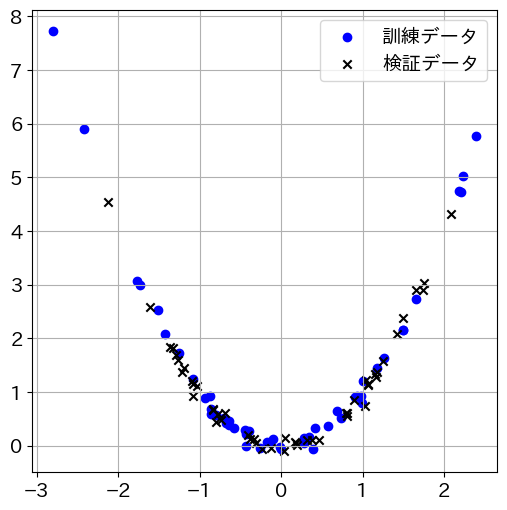

In [15]:
# 散布図表示
plt.scatter(x_train, y_train, c='b', label='訓練データ')
plt.scatter(x_test, y_test, c='k', marker='x', label='検証データ')
plt.legend()
plt.show()

In [16]:
# 入力変数x と正解値 ytのTesor化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

In [17]:
import torch.optim as optim

### 単回帰の場合

In [23]:
# モデルの定義

class Net(nn.Module):
    def __init__(self):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(1, 1)   
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [24]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [25]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels)

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 9.91996
Epoch 100 loss: 3.31341
Epoch 200 loss: 3.21711
Epoch 300 loss: 3.21547
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

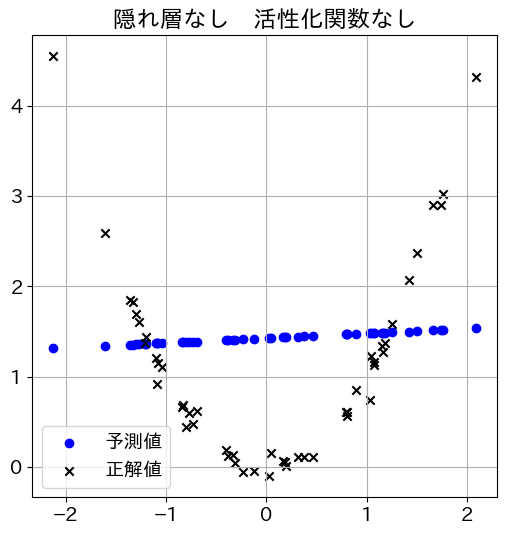

In [26]:
# 結果のグラフ化
labels_pred = net(inputs_test)

plt.title('隠れ層なし　活性化関数なし')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='予測値')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='正解値')
plt.legend()
plt.show()

### 疑似ディープラーニングの場合

In [27]:
# モデルの定義

class Net2(nn.Module):
    def __init__(self):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [28]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net2 = Net2()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net2.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [29]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net2(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels)

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.16061
Epoch 100 loss: 3.22018
Epoch 200 loss: 3.21545
Epoch 300 loss: 3.21544
Epoch 400 loss: 3.21544
Epoch 500 loss: 3.21544
Epoch 600 loss: 3.21544
Epoch 700 loss: 3.21544
Epoch 800 loss: 3.21544
Epoch 900 loss: 3.21544
Epoch 1000 loss: 3.21544
Epoch 1100 loss: 3.21544
Epoch 1200 loss: 3.21544
Epoch 1300 loss: 3.21544
Epoch 1400 loss: 3.21544
Epoch 1500 loss: 3.21544
Epoch 1600 loss: 3.21544
Epoch 1700 loss: 3.21544
Epoch 1800 loss: 3.21544
Epoch 1900 loss: 3.21544
Epoch 2000 loss: 3.21544
Epoch 2100 loss: 3.21544
Epoch 2200 loss: 3.21544
Epoch 2300 loss: 3.21544
Epoch 2400 loss: 3.21544
Epoch 2500 loss: 3.21544
Epoch 2600 loss: 3.21544
Epoch 2700 loss: 3.21544
Epoch 2800 loss: 3.21544
Epoch 2900 loss: 3.21544
Epoch 3000 loss: 3.21544
Epoch 3100 loss: 3.21544
Epoch 3200 loss: 3.21544
Epoch 3300 loss: 3.21544
Epoch 3400 loss: 3.21544
Epoch 3500 loss: 3.21544
Epoch 3600 loss: 3.21544
Epoch 3700 loss: 3.21544
Epoch 3800 loss: 3.21544
Epoch 3900 loss: 3.21544
Epoch 4000 l

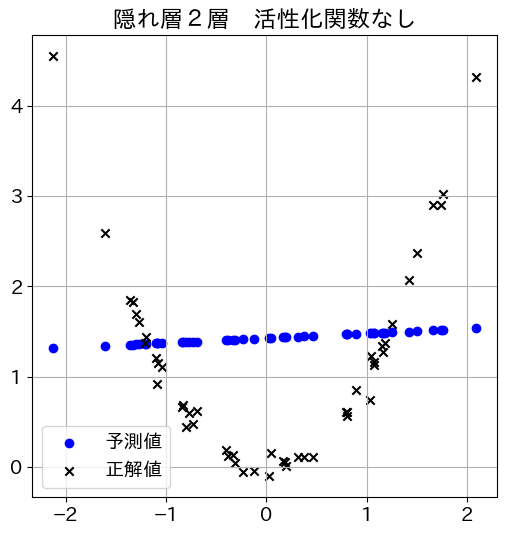

In [30]:
# 結果のグラフ化
labels_pred2 = net2(inputs_test)

plt.title('隠れ層２層　活性化関数なし')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='予測値')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='正解値')
plt.legend()
plt.show()


### ディープラーニング(活性化関数あり)の場合

In [31]:
# モデルの定義

class Net3(nn.Module):
    def __init__(self):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [32]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net3 = Net3()

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [33]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net3(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels)

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.28324
Epoch 100 loss: 0.99671
Epoch 200 loss: 0.26399
Epoch 300 loss: 0.12138
Epoch 400 loss: 0.07341
Epoch 500 loss: 0.05290
Epoch 600 loss: 0.03986
Epoch 700 loss: 0.03289
Epoch 800 loss: 0.02801
Epoch 900 loss: 0.02543
Epoch 1000 loss: 0.02405
Epoch 1100 loss: 0.02328
Epoch 1200 loss: 0.02282
Epoch 1300 loss: 0.02135
Epoch 1400 loss: 0.02048
Epoch 1500 loss: 0.01998
Epoch 1600 loss: 0.01961
Epoch 1700 loss: 0.01931
Epoch 1800 loss: 0.01906
Epoch 1900 loss: 0.01884
Epoch 2000 loss: 0.01864
Epoch 2100 loss: 0.01846
Epoch 2200 loss: 0.01832
Epoch 2300 loss: 0.01818
Epoch 2400 loss: 0.01805
Epoch 2500 loss: 0.01793
Epoch 2600 loss: 0.01784
Epoch 2700 loss: 0.01775
Epoch 2800 loss: 0.01767
Epoch 2900 loss: 0.01759
Epoch 3000 loss: 0.01751
Epoch 3100 loss: 0.01737
Epoch 3200 loss: 0.01723
Epoch 3300 loss: 0.01710
Epoch 3400 loss: 0.01698
Epoch 3500 loss: 0.01686
Epoch 3600 loss: 0.01674
Epoch 3700 loss: 0.01662
Epoch 3800 loss: 0.01649
Epoch 3900 loss: 0.01637
Epoch 4000 l

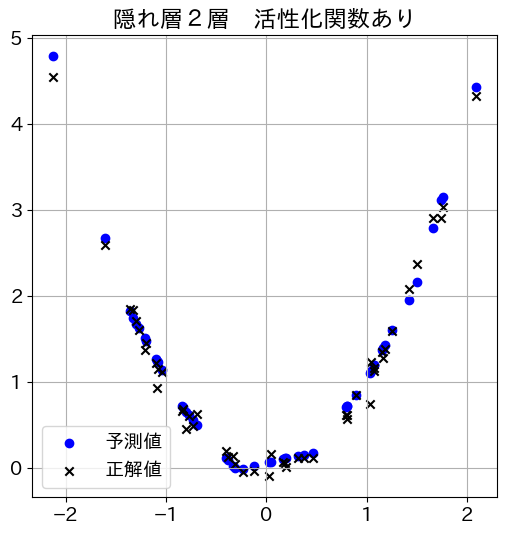

In [34]:
# 結果の可視化
labels_pred3 = net3(inputs_test)

plt.title('隠れ層２層　活性化関数あり')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='予測値')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='正解値')
plt.legend()
plt.show()
